<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Feature-Reduciton-with-PCA" data-toc-modified-id="Feature-Reduciton-with-PCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Reduciton with PCA</a></span><ul class="toc-item"><li><span><a href="#using-MinMaxScaler" data-toc-modified-id="using-MinMaxScaler-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>using MinMaxScaler</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#using-KMeans" data-toc-modified-id="using-KMeans-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>using KMeans</a></span></li><li><span><a href="#Agglomerative-hierarchical-clustering" data-toc-modified-id="Agglomerative-hierarchical-clustering-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Agglomerative hierarchical clustering</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#conclusion" data-toc-modified-id="conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>conclusion</a></span></li></ul></div>

# Library Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [3]:
data = pd.read_csv('Datasets/creditcard.csv')
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.dropna(axis = 0, how ='any',inplace=True) 

In [8]:
data.drop(columns="CUST_ID",inplace=True, axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

# EDA

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


In [11]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


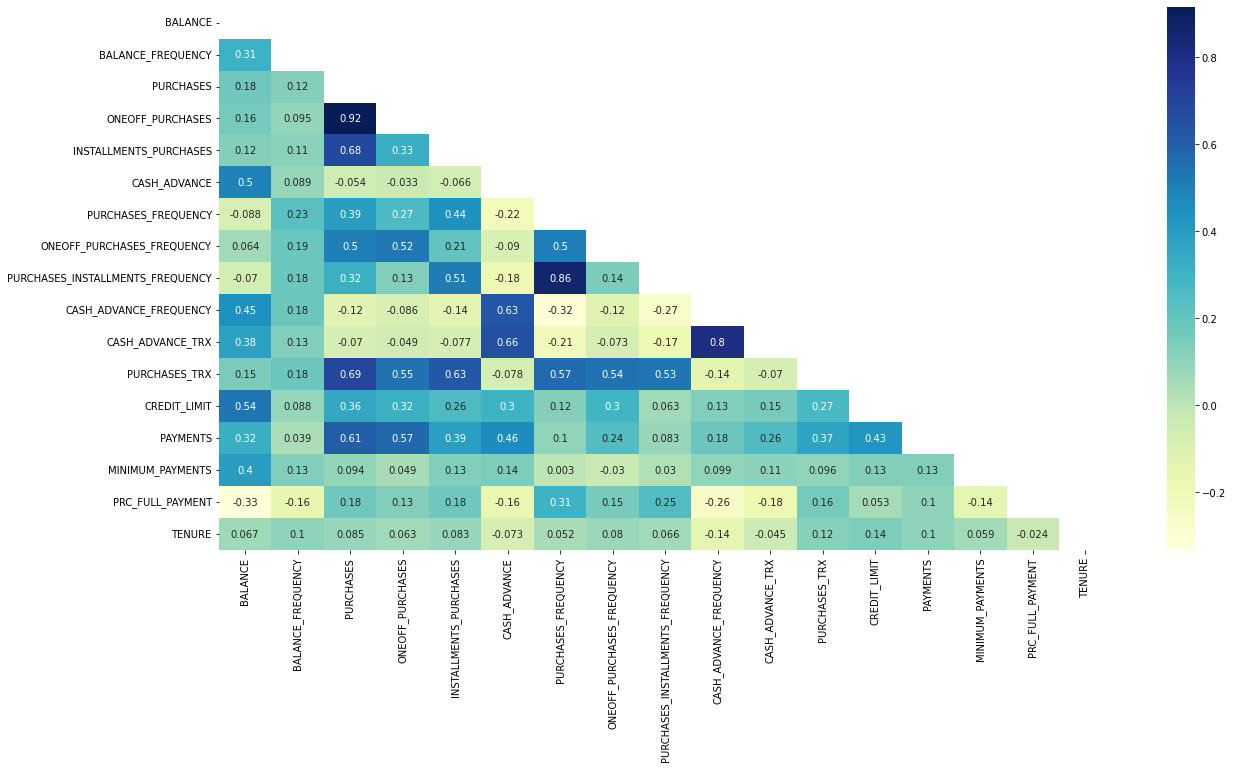

In [12]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=np.triu(data.corr()))

# Normalization

In [13]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
features =['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [15]:
data1 = data.copy()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[features] = scaler.fit_transform(data1[features])
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


<AxesSubplot: >

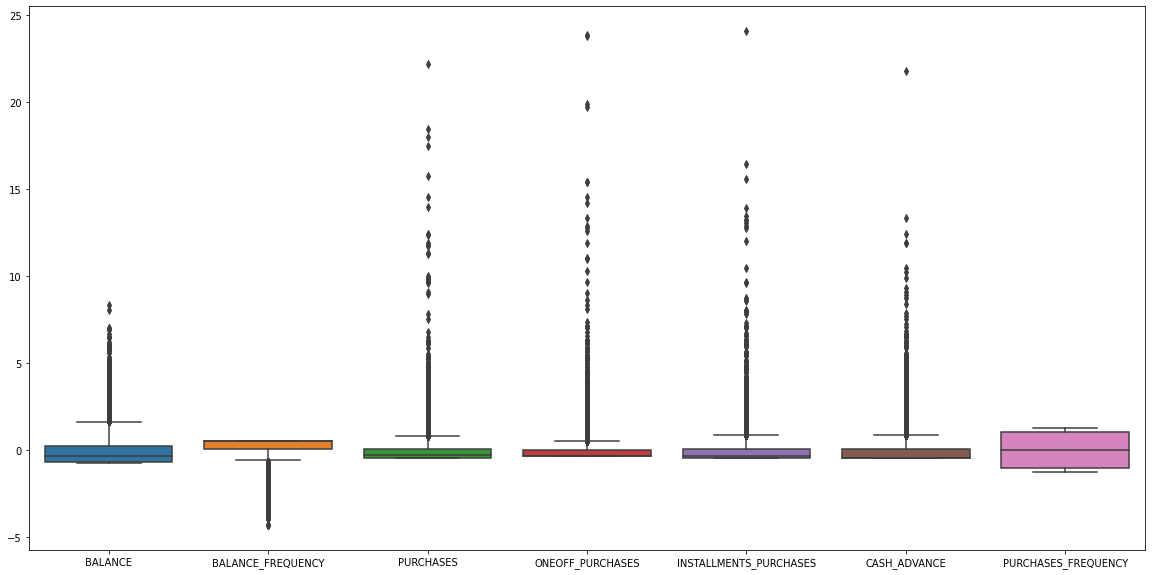

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data1.iloc[:,0:7])

<AxesSubplot: >

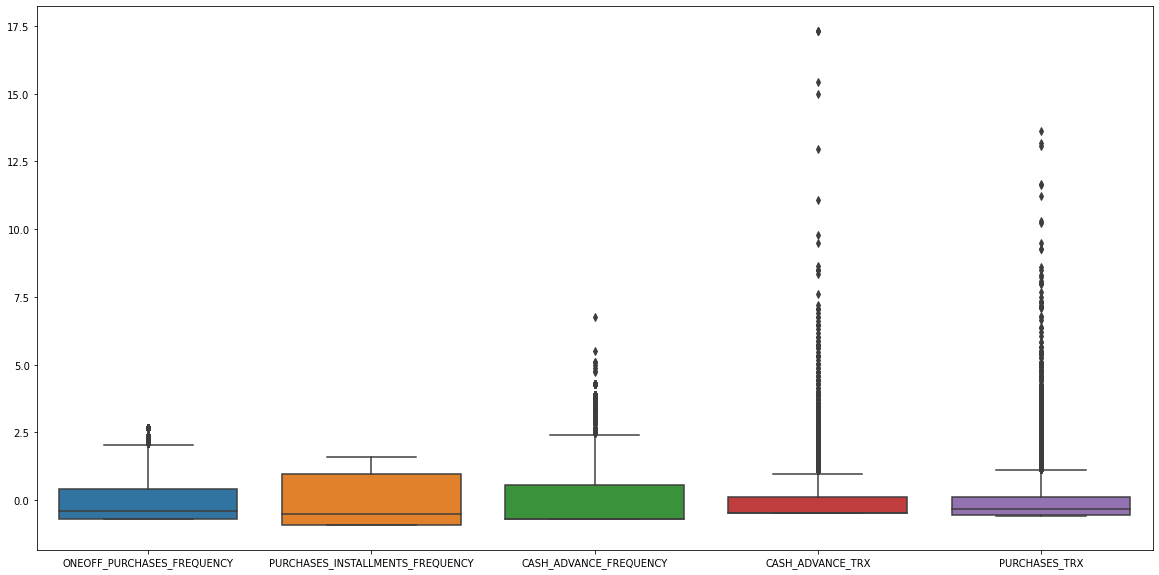

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data1.iloc[:,7:12])

<AxesSubplot: >

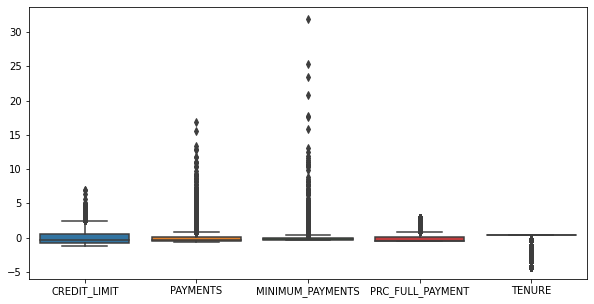

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data1.iloc[:,12:])

# Feature Reduciton with PCA

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(data1)
pca_data = pd.DataFrame(data=components, columns=['Component 1', 'Component 2', 'Component 3'])
pca_data.head()

,Component 1,Component 2,Component 3
0,-1.696393,-1.122581,0.491409
1,-1.215679,2.435641,0.694805
2,0.935854,-0.385200,-0.026054
3,-1.614637,-0.724584,0.272150
4,0.223701,-0.783609,-1.184491


In [58]:
components.shape

(8636, 3)

In [59]:
pca_data.shape

(8636, 3)

In [60]:
print(pca.explained_variance_ratio_)

[0.27231177 0.20374308 0.08918333]


In [61]:
print("Total information of 3 Component= ", sum(pca.explained_variance_ratio_))

Total information of 3 Component=  0.5652381785893428


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

Silhouette score for cluster-2 = 0.3364570653249213
Silhouette score for cluster-3 = 0.37224629284548216
Silhouette score for cluster-4 = 0.3617236098119016
Silhouette score for cluster-5 = 0.36036306623254555
Silhouette score for cluster-6 = 0.31887293118117455
Silhouette score for cluster-7 = 0.312731112598335
Silhouette score for cluster-8 = 0.3223527015291814
Silhouette score for cluster-9 = 0.3289170445034513


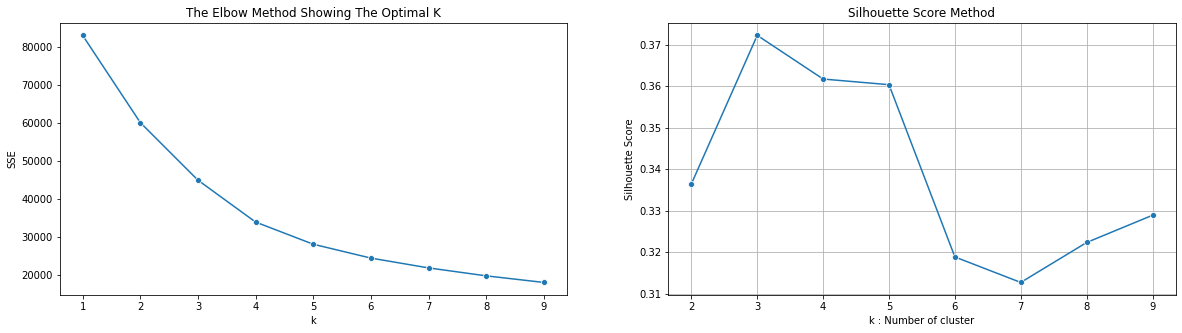

In [63]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
SSE = []
sil_score = []
k = range(1, 10)

plt.subplot(1,2,1)

for i in k:
    kmeanModel = KMeans(n_clusters = i, init = "k-means++", random_state = 42).fit(pca_data)
    kmeanModel.fit(pca_data)
    SSE.append(kmeanModel.inertia_)
    
    if i > 1: 
        labels = kmeanModel.labels_
        score = silhouette_score(pca_data, labels, metric="euclidean", random_state=42)
        sil_score.append(score)
        print(f"Silhouette score for cluster-{i} = {score}")

sns.lineplot(x=k, y=SSE, marker="o")
# ploting elbow method
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("The Elbow Method Showing The Optimal K")

plt.subplot(1,2,2)
sns.lineplot(x = range(2,9 + 1), y = sil_score, marker="o");
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

## using MinMaxScaler

In [64]:
data2 = data.copy()

In [65]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()  

data2[features] = mm_scaler.fit_transform(data2[features])
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(data2)
pca_data = pd.DataFrame(data=components, columns=['Component 1', 'Component 2', 'Component 3'])
pca_data.head()

,Component 1,Component 2,Component 3
0,-0.492046,-0.106987,-0.024615
1,-0.620691,-0.030137,0.111544
2,0.291581,0.922922,-0.133906
3,-0.567819,0.023027,-0.070132
4,0.188140,-0.249456,-0.228906


Silhouette score for cluster-2 = 0.5022901638210105
Silhouette score for cluster-3 = 0.5005078486036341
Silhouette score for cluster-4 = 0.5105635916814839
Silhouette score for cluster-5 = 0.44512375317696334
Silhouette score for cluster-6 = 0.4549317957900648
Silhouette score for cluster-7 = 0.46566342489574664
Silhouette score for cluster-8 = 0.4963219514068564
Silhouette score for cluster-9 = 0.46288997209022537


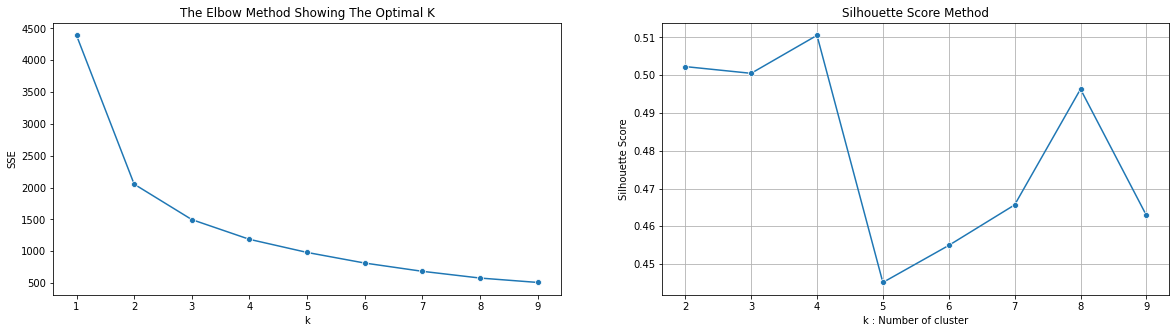

In [67]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
SSE = []
sil_score = []
k = range(1, 10)

plt.subplot(1,2,1)

for i in k:
    kmeanModel = KMeans(n_clusters = i, init = "k-means++", random_state = 42).fit(pca_data)
    kmeanModel.fit(pca_data)
    SSE.append(kmeanModel.inertia_)
    
    if i > 1: 
        labels = kmeanModel.labels_
        score = silhouette_score(pca_data, labels, metric="euclidean", random_state=42)
        sil_score.append(score)
        print(f"Silhouette score for cluster-{i} = {score}")

sns.lineplot(x=k, y=SSE, marker="o")
# ploting elbow method
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("The Elbow Method Showing The Optimal K")

plt.subplot(1,2,2)
sns.lineplot(x = range(2,9 + 1), y = sil_score, marker="o");
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

# Model building

## using KMeans

In [68]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(pca_data)
cluster = kmeansmodel.cluster_centers_
centroids = np.array(cluster)
labels = kmeansmodel.labels_
pca_data['Class'] = labels

In [69]:
pca_data

,Component 1,Component 2,Component 3,Class
0,-0.492046,-0.106987,-0.024615,0
1,-0.620691,-0.030137,0.111544,0
2,0.291581,0.922922,-0.133906,1
3,-0.567819,0.023027,-0.070132,0
4,0.188140,-0.249456,-0.228906,2
...,...,...,...,...
8631,-0.563051,-0.056264,0.207772,0
8632,0.641651,-0.439862,0.267982,2
8633,0.357222,-0.397023,0.144246,2
8634,-0.650113,-0.170495,0.310374,0


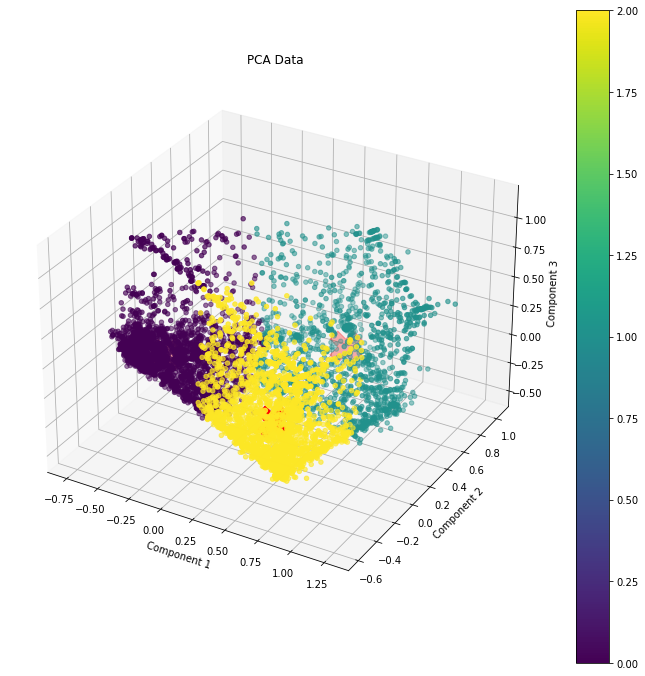

In [70]:
x = pca_data['Component 1'].values
y = pca_data['Component 2'].values
z = pca_data['Component 3'].values

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red', s=1000)
fg = ax.scatter3D(x, y, z, c = labels, cmap = "viridis")
plt.title("PCA Data")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.colorbar(fg)

In [71]:
pca_data.columns

Index(['Component 1', 'Component 2', 'Component 3', 'Class'], dtype='object')

In [72]:
sscore = silhouette_score(pca_data[['Component 1', 'Component 2', 'Component 3']], pca_data.Class)
sscore

0.5005078486036341

In [73]:
ssamples = silhouette_samples(pca_data[['Component 1', 'Component 2', 'Component 3']], pca_data.Class)
ssamples

array([0.72526618, 0.74523545, 0.46017045, ..., 0.48210678, 0.63382873,
       0.13990892])

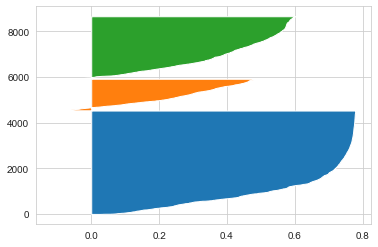

In [74]:
sns.set_style('whitegrid')
ylow = 10
for c in set(kmeansmodel.labels_):
    csample = ssamples[pca_data.Class==c]
    csample.sort()
    yup = ylow+csample.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0, csample)
    ylow = yup + 10
plt.show() 

## Agglomerative hierarchical clustering

In [105]:
from sklearn.decomposition import PCA
pca_ahc = PCA(n_components=3)
components = pca_ahc.fit_transform(data2)
pca_data_ahc = pd.DataFrame(data=components, columns=['Component 1', 'Component 2', 'Component 3'])
pca_data_ahc.head()

,Component 1,Component 2,Component 3
0,-0.492046,-0.106987,-0.024615
1,-0.620691,-0.030137,0.111544
2,0.291581,0.922922,-0.133906
3,-0.567819,0.023027,-0.070132
4,0.188140,-0.249456,-0.228906


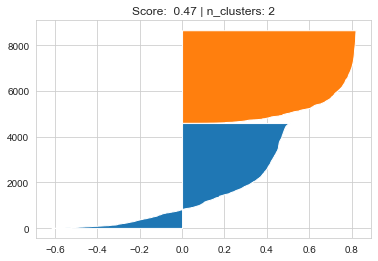

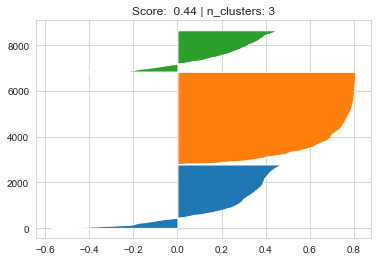

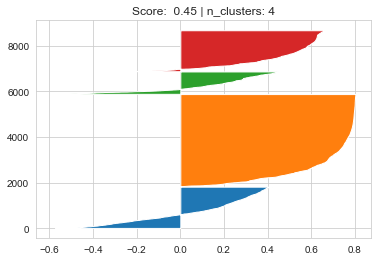

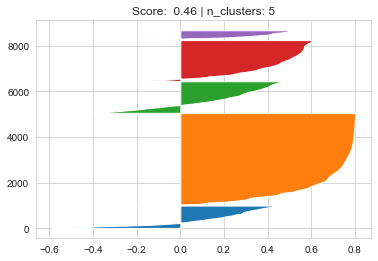

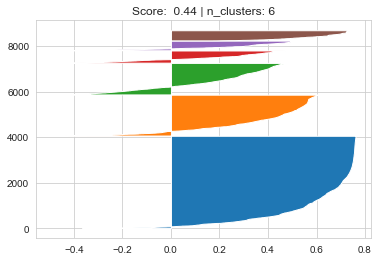

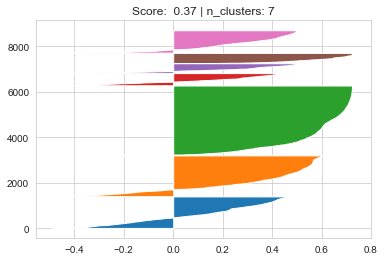

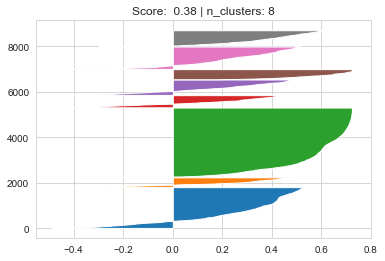

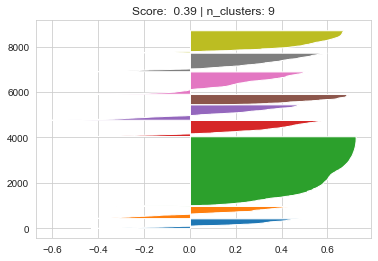

In [106]:
for k in range(2,10):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    pca_data_ahc['cluster'] = agg.fit_predict(pca_data_ahc[['Component 1', 'Component 2', 'Component 3']])
    sscore = silhouette_score(pca_data_ahc[['Component 1', 'Component 2', 'Component 3']], pca_data_ahc.cluster)
    ssamples = silhouette_samples(pca_data_ahc[['Component 1', 'Component 2', 'Component 3']], pca_data_ahc.cluster)
    ylow = 10
    for c in set(agg.labels_):
        csample = ssamples[pca_data_ahc.cluster==c]
        csample.sort()
        yup = ylow+csample.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, csample)
        ylow = yup + 10
    plt.title(f'Score: {sscore: .2f} | n_clusters: {k}')
    plt.show() 

In [84]:
pca_data_ahc

,Component 1,Component 2,Component 3
0,-0.492046,-0.106987,-0.024615
1,-0.620691,-0.030137,0.111544
2,0.291581,0.922922,-0.133906
3,-0.567819,0.023027,-0.070132
4,0.188140,-0.249456,-0.228906
...,...,...,...
8631,-0.563051,-0.056264,0.207772
8632,0.641651,-0.439862,0.267982
8633,0.357222,-0.397023,0.144246
8634,-0.650113,-0.170495,0.310374


## DBSCAN

In [121]:
from sklearn.decomposition import PCA
pca_DBSCAN = PCA(n_components=3)
components = pca_DBSCAN.fit_transform(data2)
pca_data_DBSCAN = pd.DataFrame(data=components, columns=['Component 1', 'Component 2', 'Component 3'])
pca_data_DBSCAN.head()

,Component 1,Component 2,Component 3
0,-0.492046,-0.106987,-0.024615
1,-0.620691,-0.030137,0.111544
2,0.291581,0.922922,-0.133906
3,-0.567819,0.023027,-0.070132
4,0.188140,-0.249456,-0.228906


In [126]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.10)
pca_data_DBSCAN['cluster'] = dbscan.fit_predict(pca_data_DBSCAN[['Component 1', 'Component 2', 'Component 3']])

In [127]:
silhouette_score(pca_data_DBSCAN[['Component 1', 'Component 2', 'Component 3']], pca_data_DBSCAN.cluster)

-0.30055082981909664

In [120]:
from sklearn.cluster import DBSCAN
for eps in np.linspace(0.4, 0.8, 10):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    pca_data_DBSCAN['cluster'] = dbscan.fit_predict(pca_data_DBSCAN[['Component 1', 'Component 2', 'Component 3']])
    if len(set(dbscan.labels_)) == 1:
        continue
    sscore = silhouette_score(pca_data_DBSCAN[['Component 1', 'Component 2', 'Component 3']], pca_data_DBSCAN.cluster)
    ssamples = silhouette_samples(pca_data_DBSCAN[['Component 1', 'Component 2', 'Component 3']], pca_data_DBSCAN.cluster)
    ylow = 10
    for c in set(dbscan.labels_):
        csample = ssamples[pca_data_DBSCAN.cluster==c]
        csample.sort()
        yup = ylow+csample.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, csample)
        ylow = yup + 10
    plt.title(f'Score: {sscore: .2f} | eps: {eps}')
    plt.show()

In [118]:
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


# conclusion

In [90]:
len(labels)

8636

In [93]:
data_with_knn_labels = data.copy()
data_with_knn_labels.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [94]:
data_with_knn_labels['Class'] = labels
data_with_knn_labels.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Class
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2


Text(0.5, 1.0, 'BALANCE vs Class')

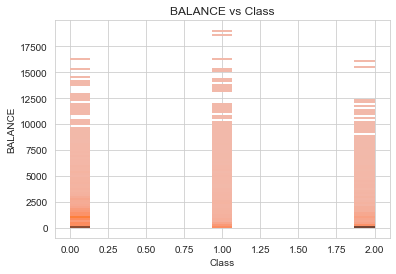

In [95]:
sns.histplot(x = 'Class', y = 'BALANCE', data = data_with_knn_labels, color = '#FF781F');
plt.title('BALANCE vs Class')

Text(0.5, 1.0, 'PURCHASES vs Class')

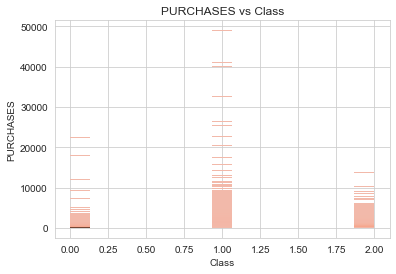

In [97]:
sns.histplot(x = 'Class', y = 'PURCHASES', data = data_with_knn_labels, color = '#FF781F');
plt.title('PURCHASES vs Class')

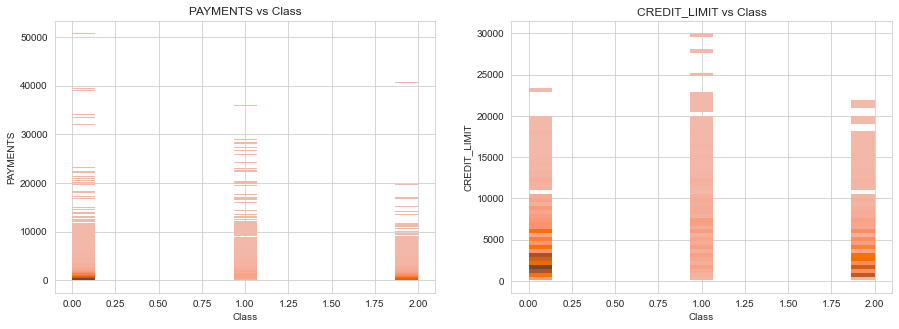

In [98]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(x = 'Class', y = 'PAYMENTS', data  = data_with_knn_labels, color = '#FF781F');
plt.title('PAYMENTS vs Class')

plt.subplot(1,2,2)
sns.histplot(x = 'Class', y = 'CREDIT_LIMIT', data  = data_with_knn_labels, color = '#FF781F');
plt.title('CREDIT_LIMIT vs Class')
plt.show()

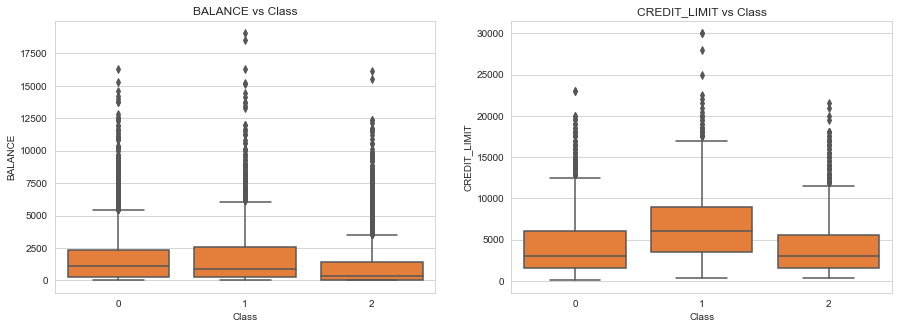

In [77]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'BALANCE', data  = data_with_knn_labels, color = '#FF781F');
plt.title('BALANCE vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'CREDIT_LIMIT', data  = data_with_knn_labels, color = '#FF781F');
plt.title('CREDIT_LIMIT vs Class')
plt.show()

Comparison between balance vs class and credit limit and class yields information that higher the balance of a class, the credit_limit will also be higher too

So the conclusion is

- class 0, low credit limit
- class 1, secondary credit limit
- class 2, high credit limit